In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Load the data
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [53]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

regions_columns_to_be_cleaned = ['continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)
# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')

# Make all headers Capitalized
merged_data.columns = [column.capitalize() for column in merged_data.columns]


In [54]:
# Load utility variables
min_age = merged_data['Age'].min()
max_age = merged_data['Age'].max()
age_groups = [(0, 18),(18, 24),(25, 34),(35, 44),(45, 54),(55, 64),(65, 100)]

# Create the age groups
merged_data['Age Group'] = merged_data['Age'].apply(lambda x: 'Under 18' if x < 18 else '18-24' if x < 24 else '25-34' if x < 34 else '35-44' if x < 44 else '45-54' if x < 54 else '55-64' if x < 64 else '65 and over')
age_group_counts = merged_data['Age Group'].value_counts()

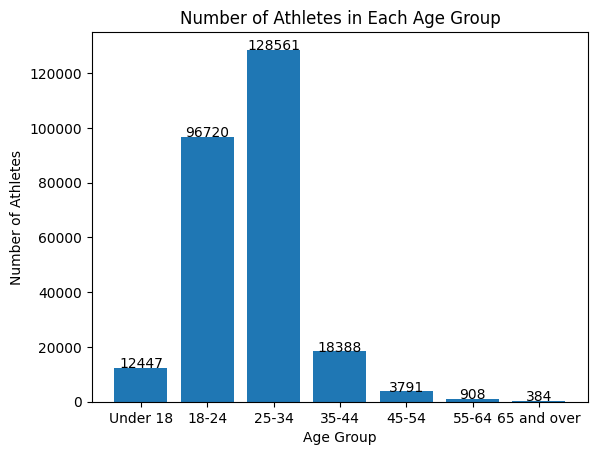

In [55]:
# Show the number of athletes in each age group
fig, ax = plt.subplots()
age_group_counts = age_group_counts.reindex(['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over'])
ax.bar(age_group_counts.index, age_group_counts.values)
ax.set_title('Number of Athletes in Each Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Athletes')
for i, v in enumerate(age_group_counts.values):
    ax.text(i, v + 10, str(v), ha='center')
  

<BarContainer object of 7 artists>

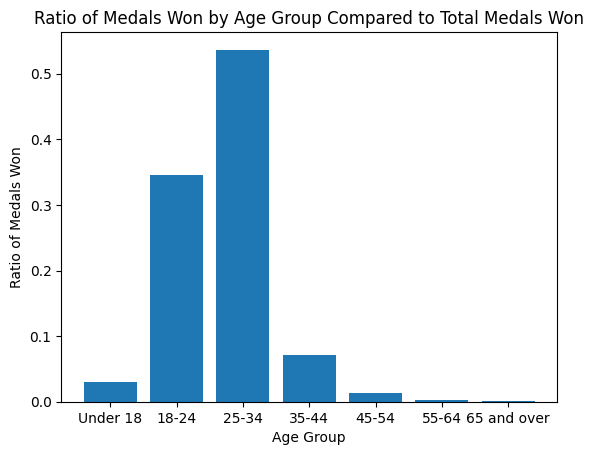

In [56]:
# 1.1
# Show the ratio of medals won by each age group compared to the total number of medals won\
# Show the amount of medals won by each age group
medals_won = merged_data.dropna(axis=0, subset=['Medal'])
medals_won = medals_won['Age Group'].value_counts()
medals_won = medals_won.reindex(['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over'])
total_medals_won = medals_won.sum()
medals_won_ratio = medals_won / total_medals_won
fig, ax = plt.subplots()
ax.set_title('Ratio of Medals Won by Age Group Compared to Total Medals Won')
ax.set_xlabel('Age Group')
ax.set_ylabel('Ratio of Medals Won')
ax.bar(medals_won_ratio.index, medals_won_ratio.values)

<BarContainer object of 5 artists>

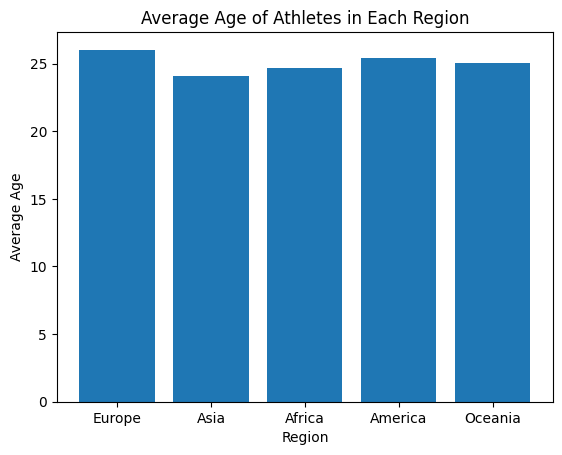

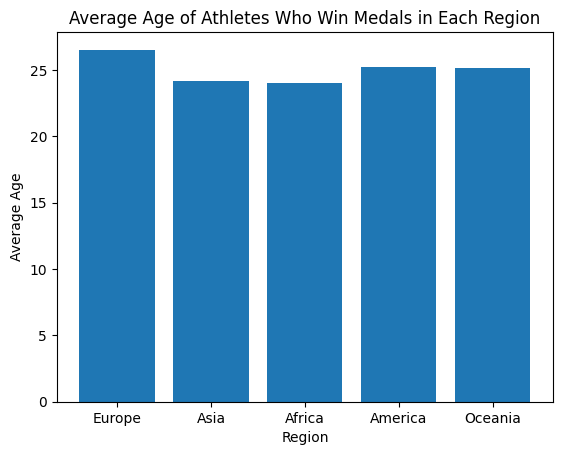

In [57]:
# 1.2
# ### 1.2. What is the average age of the athletes in each region vs the average age of the athletes who win medals in each region?

# Show the average age of the athletes in each region
average_age_of_athletes_in_each_region = merged_data.groupby('Continent')['Age'].mean()
average_age_of_athletes_in_each_region = average_age_of_athletes_in_each_region.reindex(regions_order)
fig, ax = plt.subplots()
ax.set_title('Average Age of Athletes in Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Average Age')
ax.bar(average_age_of_athletes_in_each_region.index, average_age_of_athletes_in_each_region.values)

# Show the average age of the athletes who win medals in each region
average_age_of_athletes_who_win_medals_in_each_region = merged_data.dropna(axis=0, subset=['Medal']).groupby('Continent')['Age'].mean()
average_age_of_athletes_who_win_medals_in_each_region = average_age_of_athletes_who_win_medals_in_each_region.reindex(regions_order)
fig, ax = plt.subplots()
ax.set_title('Average Age of Athletes Who Win Medals in Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Average Age')
ax.bar(average_age_of_athletes_who_win_medals_in_each_region.index, average_age_of_athletes_who_win_medals_in_each_region.values)



<BarContainer object of 5 artists>

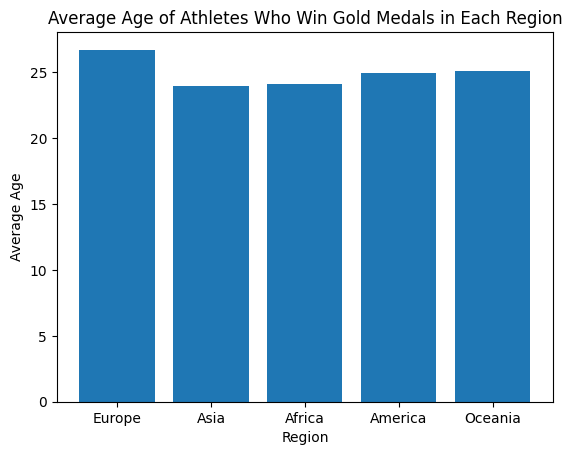

In [58]:
# 1.3
# ### 1.3. How does the average age of top performance(minimum 1 gold medal) in each region compare to each other 
# Show the average age of the athletes who win gold medals in each region
average_age_of_athletes_who_win_gold_medals_in_each_region = merged_data[merged_data['Medal'] == 'Gold'].groupby('Continent')['Age'].mean()
average_age_of_athletes_who_win_gold_medals_in_each_region = average_age_of_athletes_who_win_gold_medals_in_each_region.reindex(regions_order)
fig, ax = plt.subplots()
ax.set_title('Average Age of Athletes Who Win Gold Medals in Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Average Age')
ax.bar(average_age_of_athletes_who_win_gold_medals_in_each_region.index, average_age_of_athletes_who_win_gold_medals_in_each_region.values)

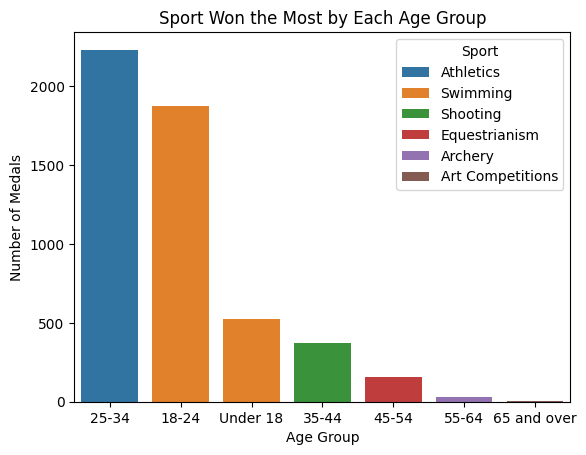

In [71]:
# 1.4
# ### 1.4. Check which sport is won the most by which age group
# Show the sport that is won the most by each age group, type of medal doesnt matter
# create a bar graph, where the x axis is the age group and the y axis is the number of medals
# color the bars based on the sport

# Show the sport that is won the most by each age group
sport_won_the_most_by_each_age_group = merged_data.dropna(axis=0, subset=['Medal']).groupby(['Age Group', 'Sport'])['Medal'].count().reset_index()
sport_won_the_most_by_each_age_group = sport_won_the_most_by_each_age_group.sort_values('Medal', ascending=False).drop_duplicates(subset='Age Group', keep='first')
fig, ax = plt.subplots()
sns.barplot(x='Age Group', y='Medal', data=sport_won_the_most_by_each_age_group, hue='Sport', ax=ax)
ax.set_title('Sport Won the Most by Each Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Medals')
plt.show()


